In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import matplotlib.font_manager as font_manager
import matplotlib as mpl

from matplotlib import rcParams
pathdata = '/Users/danielarisaro/Documents/Fundar/indice-mercado-trabajo-ingresos/'
pathdata = '/home/daniufundar/Documents/Fundar/indice-mercado-trabajo-ingresos/'

# Fuente para los graficos
font_dir = [pathdata + 'basemaps/Archivo/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

rcParams['font.family'] = 'Archivo'

# Colores fundar
fundar_colores_primarios = ['#7BB5C4', '#9FC1AD', '#D3D3E0',  '#8d9bff', '#FF9750', '#FFD900',]
fundar_colores_secundarios = ['#B5E0EA', '#B3B3B3', '#848279', '#AFA36E', '#5D896F', '#9C9CBC', '#E27124']
fundar_white = '#F5F5F5'
fundar_black = '#151515'

# Directorio de los archivos .xlsx
directorio = '/Users/danielarisaro/Documents/Fundar/proyecto_pesca/data/Desembarques/'
directorio = "/home/daniufundar/Documents/Fundar/proyecto_pesca/data/Desembarques/"

# Inicializar un DataFrame vacío para almacenar los datos
datos_desembarques = pd.DataFrame(columns=['Año', 'Total'])

years = np.arange(1989, 2023, 1)

# Leer archivos .xlsx en el directorio
for iyear in years:
    archivo_xls = os.path.join(directorio, f"{iyear}.xls")
    archivo_xlsx = os.path.join(directorio, f"{iyear}.xlsx")

    if os.path.exists(archivo_xls):
        ruta_archivo = archivo_xls
    elif os.path.exists(archivo_xlsx):
        ruta_archivo = archivo_xlsx
    else:
        continue

    # Determinar el motor adecuado según la extensión del archivo
    motor = 'openpyxl' if ruta_archivo.endswith(".xlsx") else 'xlrd'

    # Determinar el header según el año
    header_value = 6 if iyear >= 2020 else 2

    # Leer el archivo .xlsx
    df = pd.read_excel(ruta_archivo, engine=motor, header=header_value, index_col=0)

    try:
        result = df[df.index == 'Total']['Total']
        if not result.empty and pd.notna(result.iloc[0]):
            datos_desembarques = datos_desembarques.append({'Año': iyear, 'Total': result.iloc[0]}, ignore_index=True)

    except KeyError:
        pass

    try:
        result = df[df['PECES'].str.upper() == 'TOTAL']['Total']
        if not result.empty and pd.notna(result.iloc[0]):
            datos_desembarques = datos_desembarques.append({'Año': iyear, 'Total': result.iloc[0]}, ignore_index=True)

    except KeyError:
        pass

    try:
        result = df[df.index == 'TOTAL']['Total']
        if not result.empty and pd.notna(result.iloc[0]):
            datos_desembarques = datos_desembarques.append({'Año': iyear, 'Total': result.iloc[0]}, ignore_index=True)

    except KeyError:
        pass

In [2]:
# Datos proporcionados
datos = {
    'Año': [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Exportaciones Pesqueras (Millones de dólares)': [895, 718, 886, 817, 811, 1249, 1104, 1299, 1118, 1320, 1490, 1332, 1502, 1580, 1466, 1724, 1978, 2148, 1863, 1729, 1990, 1823]
}

# Crear el DataFrame
df_expos = pd.DataFrame(datos)


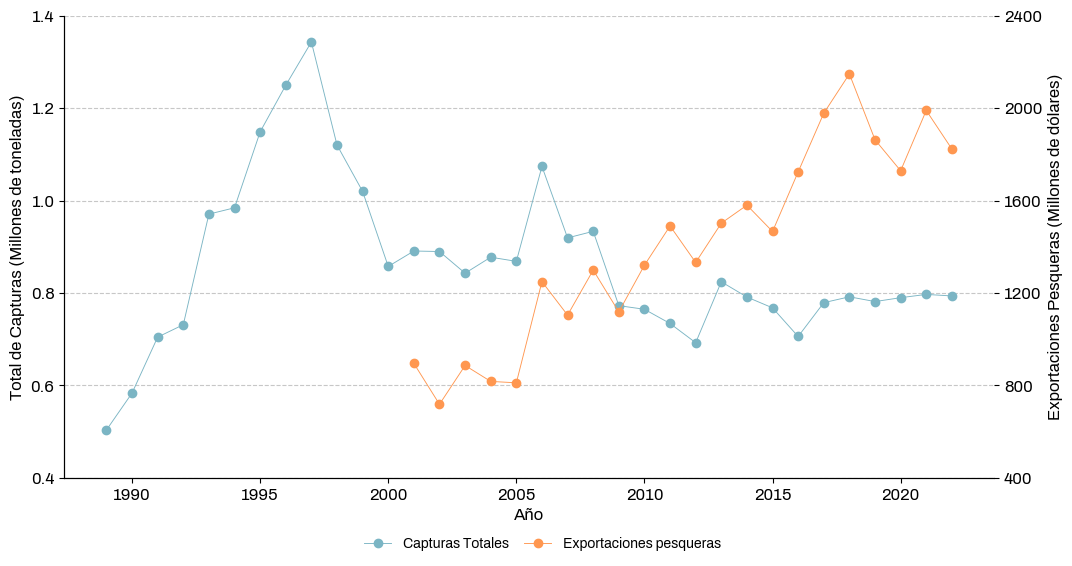

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot para las Capturas Totales
ax.plot(datos_desembarques['Año'], datos_desembarques['Total']/1e6, marker='o', linestyle='-', 
        lw=0.65, color=fundar_colores_primarios[0], label='Capturas Totales')
ax.set_xlabel('Año', fontsize=12, color='black')
ax.set_ylabel('Total de Capturas (Millones de toneladas)', fontsize=12, color='black')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='upper center', 
                  bbox_to_anchor=(0.4, -.1), 
                  frameon=False)
ax.set_ylim([0.4, 1.4])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=12, colors='black')

# Crear un segundo eje y para las Exportaciones Pesqueras
ax2 = ax.twinx()
ax2.plot(df_expos['Año'], df_expos['Exportaciones Pesqueras (Millones de dólares)'], marker='o', linestyle='-', 
         lw=0.65, color=fundar_colores_primarios[4], label='Exportaciones pesqueras')
ax2.set_ylabel('Exportaciones Pesqueras (Millones de dólares)', fontsize=12, color='black')
ax2.legend(loc='upper center', 
                  bbox_to_anchor=(0.6, -.1), 
                  frameon=False)
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.set_ylim([400,2400])
ax2.set_yticks([400, 800, 1200, 1600, 2000, 2400])
ax2.tick_params(axis='y', which='both', labelsize=12, colors='black')

fig.savefig('/home/daniufundar/Documents/Fundar/proyecto_pesca/figs/' + 'evolucion_capturas.pdf')
fig.savefig('/home/daniufundar/Documents/Fundar/proyecto_pesca/figs/' + 'evolucion_capturas.png', dpi=400)
